## Importing the libraries

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

## Importing the dataset

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Preprocessing

In [7]:
# Droping coloumn
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.sample(2)

,TV,Radio,Newspaper,Sales
71,109.8,14.3,31.7,12.4
66,31.5,24.6,2.2,9.5


In [8]:
# Checking for missing value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
# Checking for duplicate value
df.duplicated().any()

False

In [9]:
# Infromation of DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# Discribsion of the DataSet
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualization

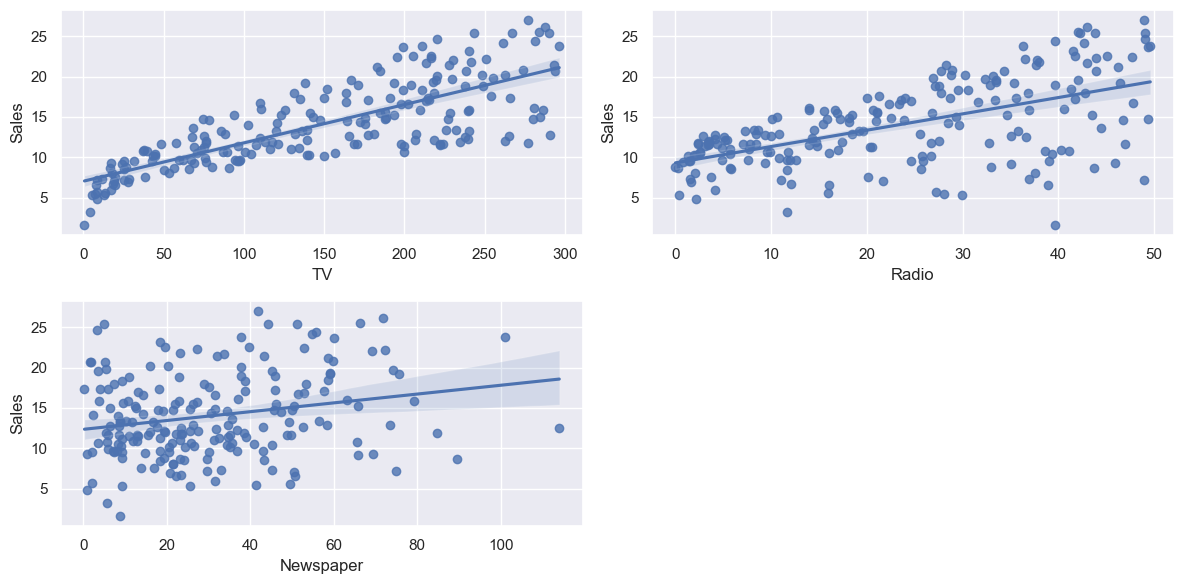

In [35]:
plt.figure(figsize=(12,6))
for i,col in enumerate(['TV','Radio','Newspaper']):
    plt.subplot(2,2,i+1)
    sns.regplot(data=df, x=col, y='Sales')
    plt.tight_layout()

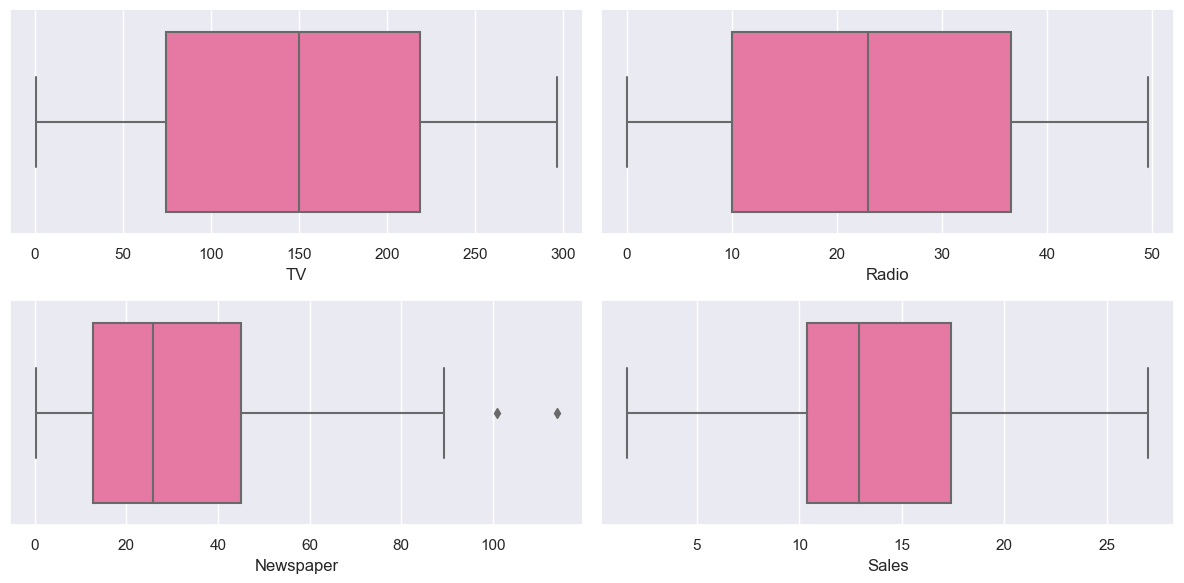

In [36]:
plt.figure(figsize=(12,6))
for i,col in enumerate(['TV','Radio','Newspaper','Sales']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x=col, orient='h', palette='RdPu')
    plt.tight_layout()

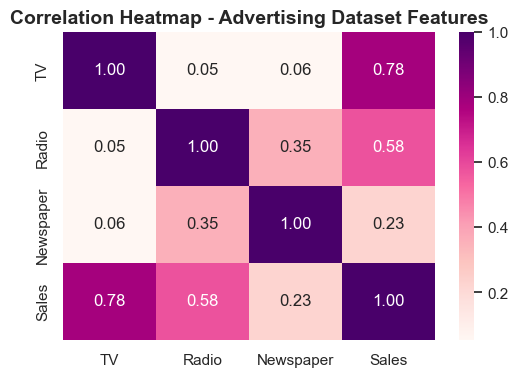

In [30]:
# Calculatation of correlation matrix
correlation_matrix = df.corr()

# The heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Heatmap - Advertising Dataset Features', fontsize = 14, fontweight = 'bold')
plt.show()

In [40]:
correlation_matrix['Sales'].round(2)

TV           0.78
Radio        0.58
Newspaper    0.23
Sales        1.00
Name: Sales, dtype: float64

- **Analysis:**
1. Each feature 'TV', 'Radio', 'Newspaper' has a positive corration which targat variable 'Sales'.
1. TV has the highest positive correlation with Sales. To increase the sales we have to more focus on independent feature TV.
1. Newspaper has lowest correlation with sales.
1. The Dataset has no outliers.

## Feature Engineering

In [42]:
df['Total_advertising']=df['TV']+df['Radio']+df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,Total_advertising
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Diving the dataset into independent variable(X) and target variable(y)

In [44]:
X = df.drop('Sales',axis=1).values
y = df['Sales'].values

## Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [47]:
y_pred = regressor.predict(X_test)
pred_data = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
pred_data.columns = ['Y Test Predictions', 'Y Test Actual']
pred_data.head()

,Y Test Predictions,Y Test Actual
0,10.057396,11.3
1,7.452281,8.4
2,7.019708,8.7
3,24.080297,25.4
4,12.017863,11.7


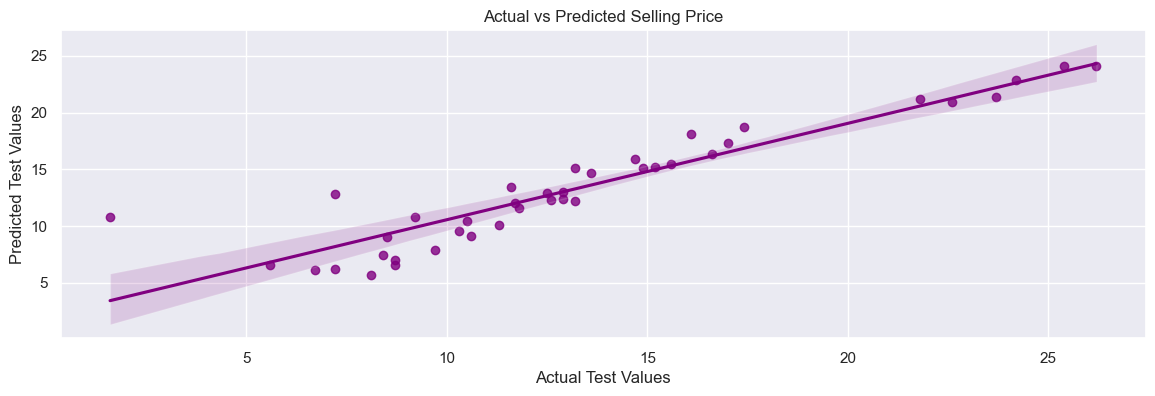

In [49]:
plt.figure(figsize=(14,4))
sns.regplot(x = y_test, y = y_pred,color='purple')
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()